In [1]:
# Instalación de TensorFlow (si no está instalado)
!pip install tensorflow

# Importar las librerías necesarias
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Cargar el conjunto de datos MNIST (números escritos a mano)
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Normalizar las imágenes
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Definir el modelo de red neuronal convolucional
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [5]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Añadir una dimensión para el canal de color (escala de grises)
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 83s 43ms/step - loss: 0.1444 - accuracy: 0.9560 - val_loss: 0.0529 - val_accuracy: 0.9828
Epoch 2/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0451 - accuracy: 0.9861 - val_loss: 0.0409 - val_accuracy: 0.9869
Epoch 3/5
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0331 - accuracy: 0.9899 - val_loss: 0.0301 - val_accuracy: 0.9898
Epoch 4/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0250 - accuracy: 0.9919 - val_loss: 0.0386 - val_accuracy: 0.9881
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.0319 - accuracy: 0.9901
Test accuracy: 0.9901000261306763


In [7]:


# Función para mostrar imágenes y predicciones
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                         100 * np.max(predictions_array),
                                         true_label),
               color=color)

In [8]:
# Mostrar una imagen con sus predicciones
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 [==============================] - 4s 11ms/step


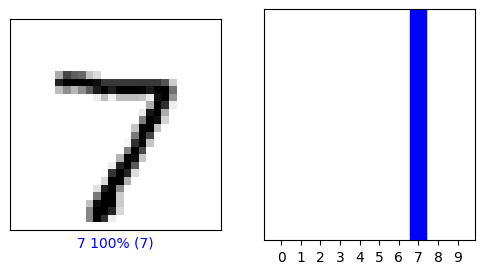

In [9]:
# Hacer predicciones
predictions = model.predict(test_images)

# Seleccionar una imagen de prueba
img_index = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(img_index, predictions, test_labels, test_images.squeeze())
plt.subplot(1,2,2)
plot_value_array(img_index, predictions,  test_labels)
plt.show()